In [2]:
pip install diagrams

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.4/24.4 MB 53.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 877.7/877.7 kB 57.3 MB/s eta 0:00:00


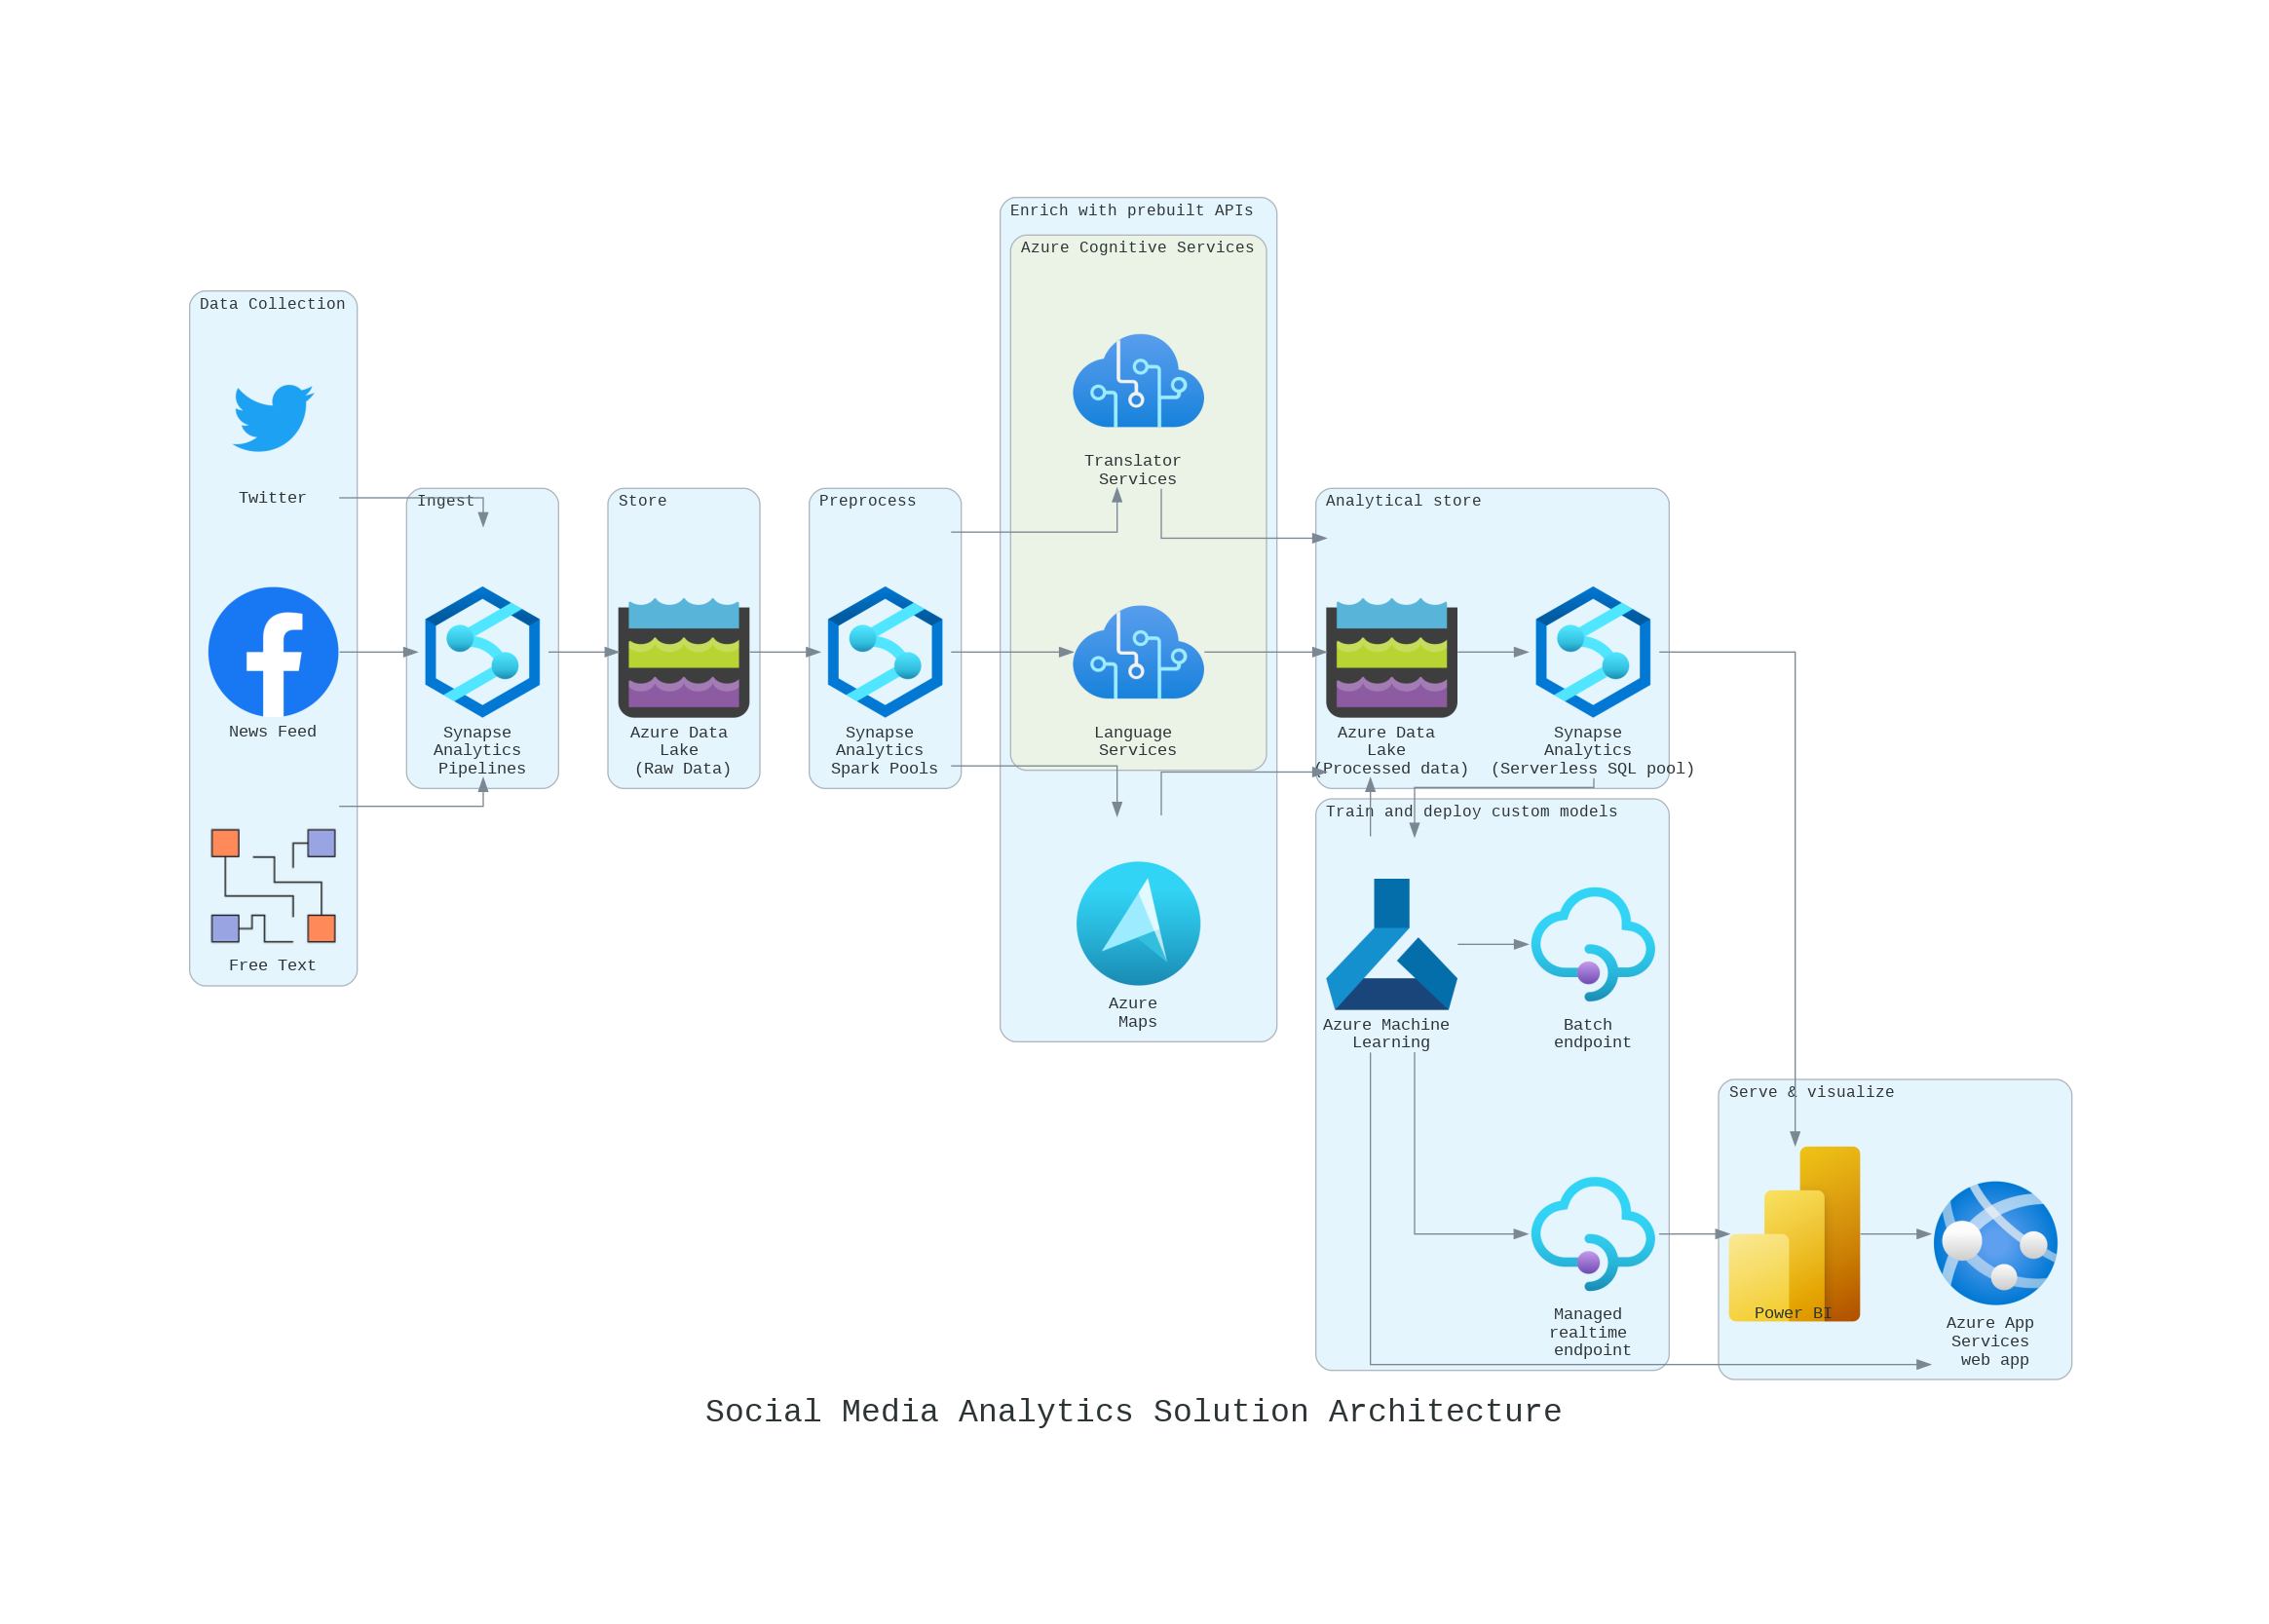

In [16]:
from diagrams.gcp.compute import Functions
from graphviz import sources
from diagrams import Cluster, Diagram
from diagrams.azure.analytics import SynapseAnalytics, DataFactories, Databricks, EventHubs, EventHubClusters
from diagrams.azure.database import CosmosDb
from diagrams.azure.iot import IotHub, Maps
from diagrams.azure.storage import DataLakeStorage, StorageAccounts
from diagrams.azure.ml import MachineLearningServiceWorkspaces, CognitiveServices
from diagrams.azure.integration import APIManagement
from diagrams.azure.web import AppServices
from diagrams.custom import Custom
from urllib.request import urlretrieve

graph_attr = {
    "fontsize": "25",
    "bgcolor": "transparent",
    "imagescale": "True"
}

with Diagram("Social Media Analytics Solution Architecture", show=False, graph_attr=graph_attr) as soc_diag:
    #sa = SynapseAnalytics("sa")
    #flow = Dataflow("DataFlow")

    with Cluster("Data Collection"):
        twitter_url = "https://github.com/mingrammer/diagrams/raw/master/resources/saas/social/twitter.png"
        twitter_icon = "twitter.png"
        urlretrieve(twitter_url, twitter_icon)

        twitter = Custom("Twitter", twitter_icon)

        facebook_url = "https://github.com/mingrammer/diagrams/raw/master/resources/saas/social/facebook.png"
        facebook_icon = "facebook.png"
        urlretrieve(facebook_url, facebook_icon)

        facebook = Custom("News Feed", facebook_icon)

        diagrams_url = "https://github.com/mingrammer/diagrams/raw/master/assets/img/diagrams.png"
        diagrams_icon = "diagrams.png"
        urlretrieve(diagrams_url, diagrams_icon)

        diagrams = Custom("Free Text", diagrams_icon)

        source = [facebook,
         diagrams,
         twitter]
        # Functions("Twitter Data")]

    with Cluster("Ingest"):
        sa = SynapseAnalytics("Synapse \nAnalytics \nPipelines")
        source >> sa

    with Cluster("Store"):
        dl = DataLakeStorage("Azure \Data \nLake \n(Raw Data)")
        sa >> dl

    with Cluster("Preprocess"):
        pp = SynapseAnalytics("Synapse \nAnalytics \nSpark Pools")
        dl >> pp

    with Cluster("Enrich with prebuilt APIs"):
        with Cluster("Azure Cognitive Services"):
          cgs = [ CognitiveServices("Translator \nServices"),
                 CognitiveServices("Language \nServices")]      
        pp >> cgs          
        map = Maps("Azure \nMaps")
        pp >> map 

    with Cluster("Train and deploy custom models"):
        aml = MachineLearningServiceWorkspaces ("Azure \Machine \nLearning")
        rt = APIManagement ("Managed \nrealtime \nendpoint")
        aml >> rt
        batch = APIManagement ("Batch \nendpoint")
        aml >> batch


    with Cluster("Analytical store"):
        adl = DataLakeStorage("Azure \Data \nLake \n(Processed data)")
        sa = SynapseAnalytics("Synapse \nAnalytics \n(Serverless SQL pool)")
        cgs >> adl
        map >> adl
        adl >> sa
        aml >> adl

    with Cluster("Serve & visualize"):
        app = AppServices("Azure \App \nServices \nweb app")
        aml >> app
        pbi_url = "https://github.com/microsoft/PowerBI-Icons/raw/main/PNG/Power-BI.png"
        pbi_icon = "Power-BI.png"
        urlretrieve(pbi_url, pbi_icon)

        pbi = Custom("Power BI", pbi_icon)
        rt >> pbi
        sa >> pbi
        pbi >> app

sa >>  aml


soc_diag

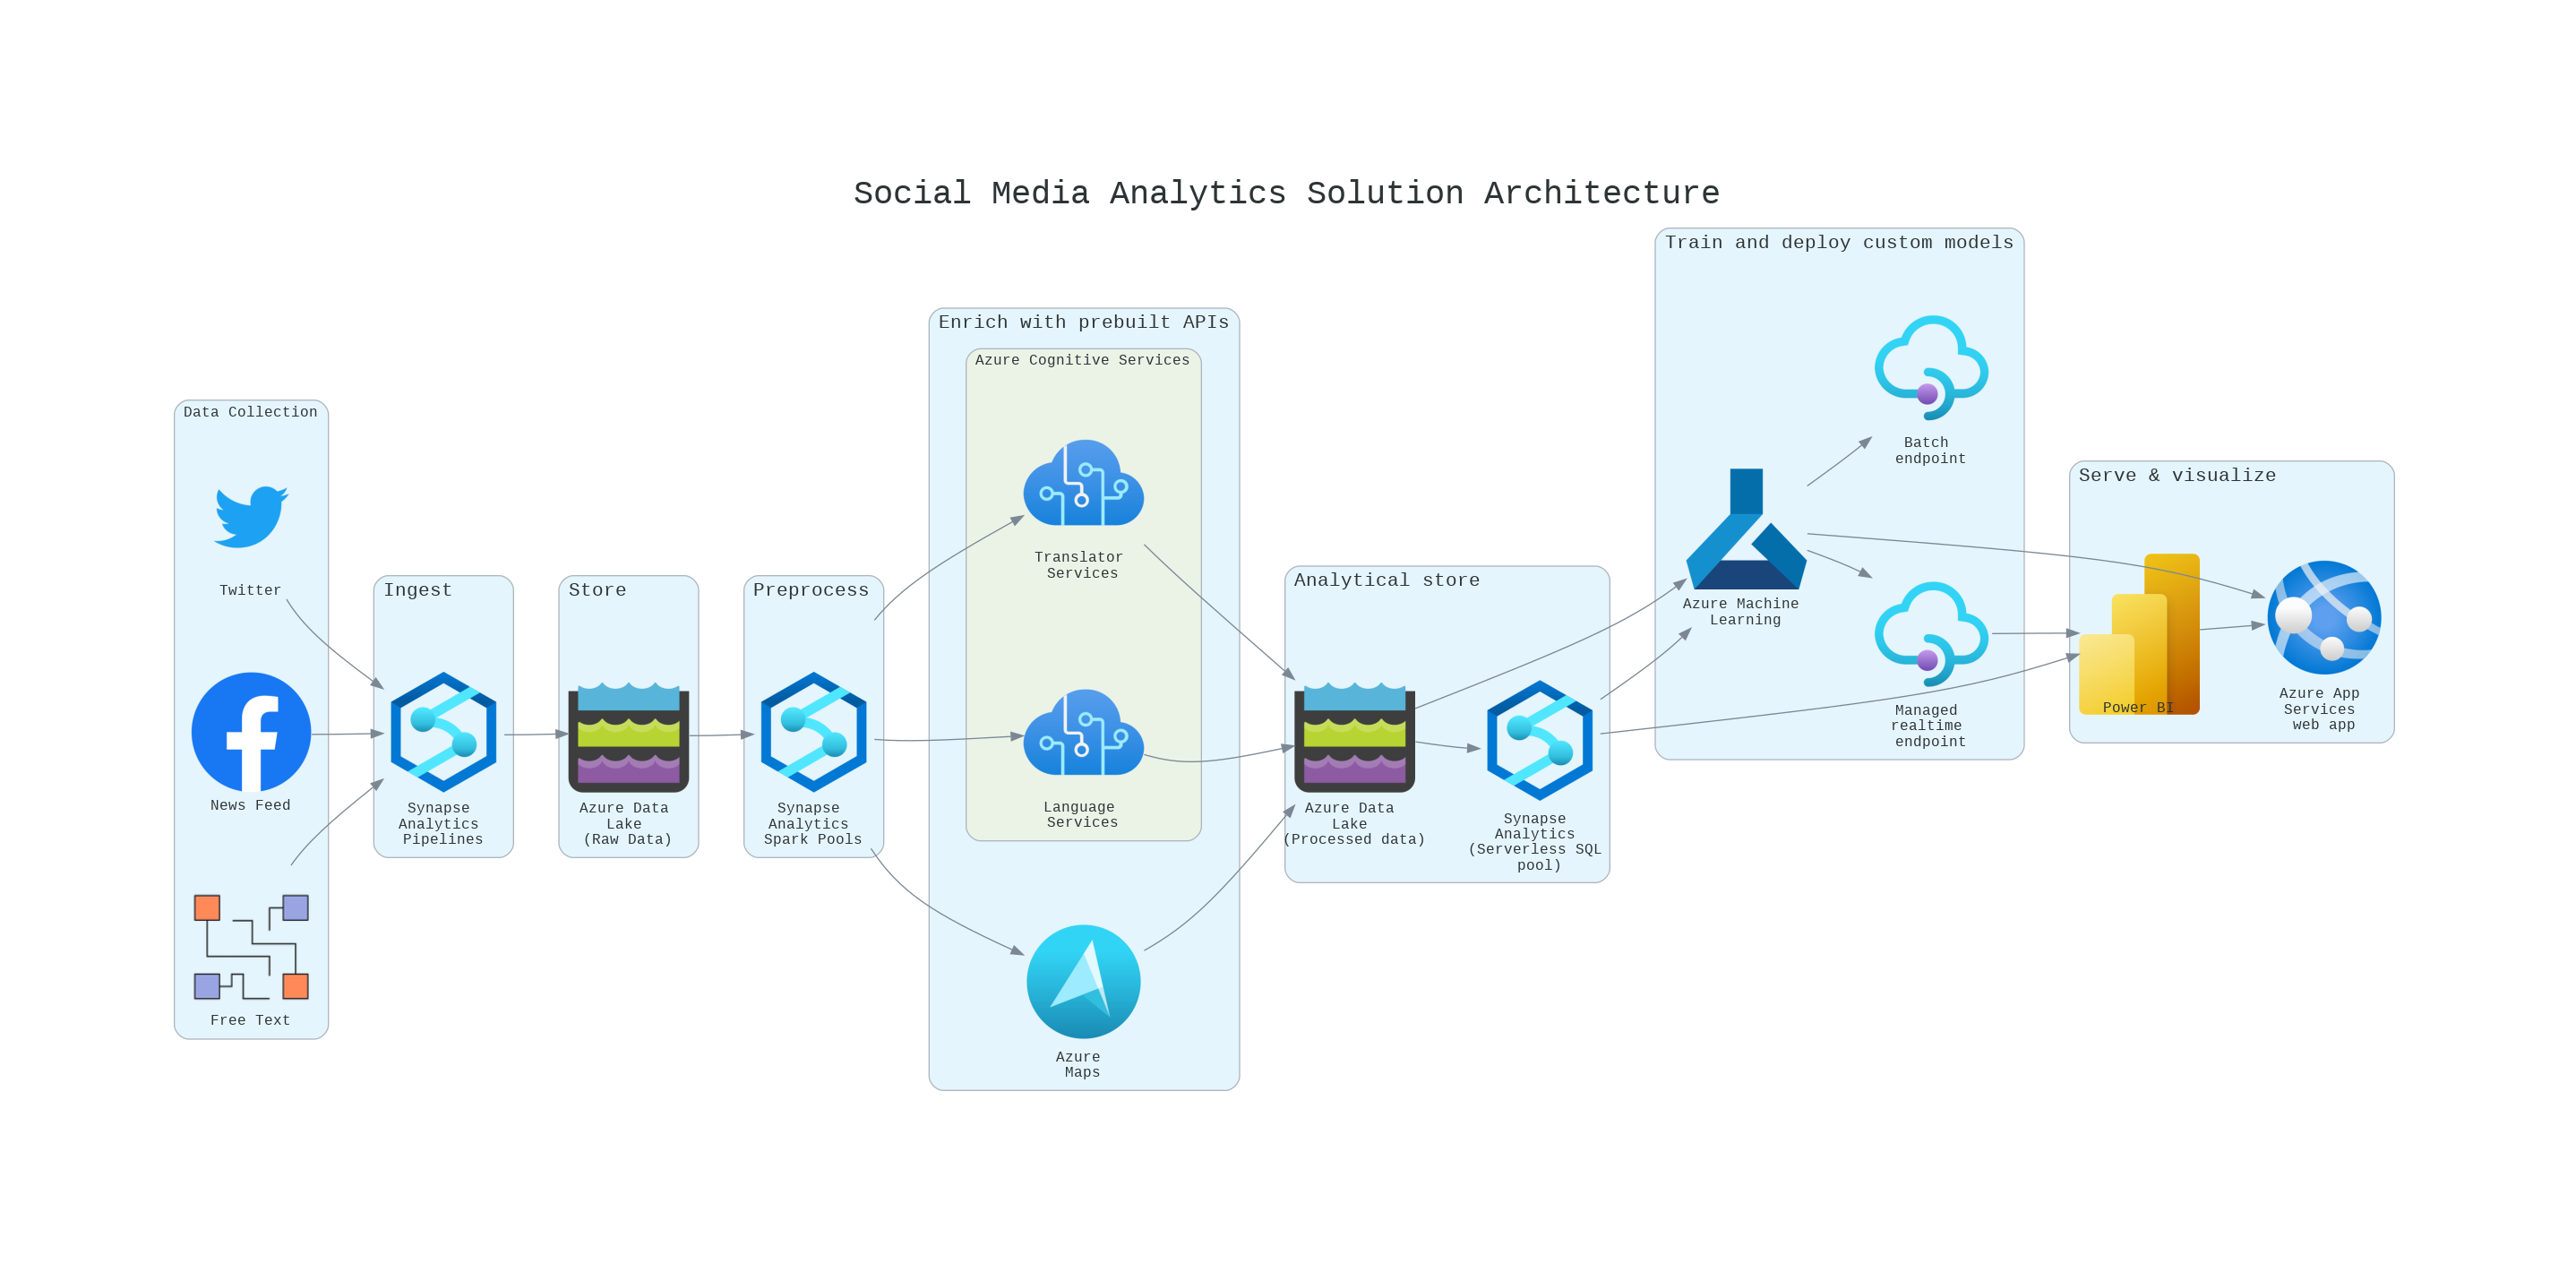

In [53]:
from diagrams.gcp.compute import Functions
from graphviz import sources
from diagrams import Cluster, Diagram
from diagrams.azure.analytics import SynapseAnalytics, DataFactories, Databricks, EventHubs, EventHubClusters
from diagrams.azure.database import CosmosDb
from diagrams.azure.iot import IotHub, Maps
from diagrams.azure.storage import DataLakeStorage, StorageAccounts
from diagrams.azure.ml import MachineLearningServiceWorkspaces, CognitiveServices
from diagrams.azure.integration import APIManagement
from diagrams.azure.web import AppServices
from diagrams.custom import Custom
from urllib.request import urlretrieve

graph_attr = {
    "fontsize": "20",
    "bgcolor": "transparent",
    "imagescale": "True",
    "lheight": "4",
    "center": "True"

}

node_attr = {
    "fontsize": "12",
    "bgcolor": "transparent",
    "imagescale": "True",
    "lheight": "2",
    "center": "True"

}


common_cluster ={
"labelloc" : "t",
"fontsize" : "16",
"orientation" : "portrait",
"center": "True",
"imagescale": "True"
}


main_cluster ={
"labelloc" : "t",
"fontsize" : "28",
#"splines" : "spline",
"splines" : "curved"
}


with Diagram("Social Media Analytics Solution Architecture", show=True, graph_attr=main_cluster,node_attr=node_attr, outformat="jpg" ) as soc_diag:
    #sa = SynapseAnalytics("sa")
    #flow = Dataflow("DataFlow")

    with Cluster("Data Collection"):
        twitter_url = "https://github.com/mingrammer/diagrams/raw/master/resources/saas/social/twitter.png"
        twitter_icon = "twitter.png"
        urlretrieve(twitter_url, twitter_icon)

        twitter = Custom("Twitter", twitter_icon)

        facebook_url = "https://github.com/mingrammer/diagrams/raw/master/resources/saas/social/facebook.png"
        facebook_icon = "facebook.png"
        urlretrieve(facebook_url, facebook_icon)

        facebook = Custom("News Feed", facebook_icon)

        diagrams_url = "https://github.com/mingrammer/diagrams/raw/master/assets/img/diagrams.png"
        diagrams_icon = "diagrams.png"
        urlretrieve(diagrams_url, diagrams_icon)

        diagrams = Custom("Free Text", diagrams_icon)

        source = [facebook,
         diagrams,
         twitter]
        # Functions("Twitter Data")]

    with Cluster("Ingest", graph_attr=common_cluster):
        sa = SynapseAnalytics("Synapse \nAnalytics \nPipelines")
        source >> sa

    with Cluster("Store", graph_attr=common_cluster):
        dl = DataLakeStorage("Azure \Data \nLake \n(Raw Data)")
        sa >> dl

    with Cluster("Preprocess", graph_attr=common_cluster):
        pp = SynapseAnalytics("Synapse \nAnalytics \nSpark Pools")
        dl >> pp

    with Cluster("Enrich with prebuilt APIs", graph_attr=common_cluster):
        with Cluster("Azure Cognitive Services"):
          cgs = [ CognitiveServices("Translator \nServices"),
                 CognitiveServices("Language \nServices")]      
        pp >> cgs          
        map = Maps("Azure \nMaps")
        pp >> map 

    with Cluster("Analytical store", graph_attr=common_cluster):
        adl = DataLakeStorage("Azure \Data \nLake \n(Processed data)")
        sa = SynapseAnalytics("Synapse \nAnalytics \n(Serverless SQL \npool)")
        cgs >> adl
        map >> adl
        adl >> sa
        

    with Cluster("Train and deploy custom models", graph_attr=common_cluster):
        aml = MachineLearningServiceWorkspaces ("Azure \Machine \nLearning")
        rt = APIManagement ("Managed \nrealtime \nendpoint")     
        batch = APIManagement ("Batch \nendpoint")      
        adl >> aml
        aml >> rt
        aml >> batch



    with Cluster("Serve & visualize", graph_attr=common_cluster):
        app = AppServices("Azure \App \nServices \nweb app")      
        pbi_url = "https://github.com/microsoft/PowerBI-Icons/raw/main/PNG/Power-BI.png"
        pbi_icon = "Power-BI.png"
        urlretrieve(pbi_url, pbi_icon)

        pbi = Custom("Power BI", pbi_icon)
        rt >> pbi
        sa >> pbi
        pbi >> app
        aml >> app

sa >>  aml


soc_diag